In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
cus_df = pd.read_csv("new_columns_customer_segmentation.csv")
cus_df.head()

,cif_id,schm_type,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,tenure,minimum_payments,prc_full_payment,credit_limit
0,DLNINDV1034377,SBA,26694.96,0,1160.00,960.00,200.00,0.0,0,0,0.0,0,0,3,27854.96,28,12500.0,0,250000.0
1,DLNINDV1593478,SBA,595007.27,0,2685491.73,579037.54,2106454.19,0.0,15,0,0.0,0,0,1,3280499.00,26,1875.0,0,37500.0
2,DLNINDV1884561,TDA,-891074.92,0,1001500.00,999000.00,2500.00,0.0,0,0,0.0,0,0,7,110425.08,30,3125.0,0,62500.0
3,DLNINDV1884561,SBA,-891074.92,0,1001500.00,999000.00,2500.00,0.0,0,0,0.0,0,0,7,110425.08,30,3125.0,0,62500.0
4,DLNINDV2090590,SBA,40785.14,0,0.00,0.00,0.00,0.0,0,0,NaN,0,0,3,40785.14,38,1250.0,0,25000.0


In [5]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cif_id                            219 non-null    object 
 1   schm_type                         219 non-null    object 
 2   balance                           219 non-null    float64
 3   balance_frequency                 219 non-null    int64  
 4   purchases                         219 non-null    float64
 5   oneoff_purchases                  219 non-null    float64
 6   installments_purchases            219 non-null    float64
 7   cash_advance                      219 non-null    float64
 8   purchases_frequency               219 non-null    int64  
 9   oneoff_purchases_frequency        219 non-null    int64  
 10  purchases_installments_frequency  183 non-null    float64
 11  cash_advance_frequency            219 non-null    int64  
 12  cash_adv

# 1. Data Analysis
### 1.1 Minimum and Maximum amount in Balance Attribute

In [6]:
max_blc = cus_df['balance'].max()
min_blc = cus_df['balance'].mean()
mean_blc = cus_df['balance'].min()

print("Maximum Balance:", max_blc)
print("Manimum Balance:", min_blc)
print("Mean Balance:", mean_blc)

Maximum Balance: 980591166.9799995
Manimum Balance: 16825953.495433778
Mean Balance: -78799446.60000038


In [11]:
cus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,219.0,1.682595e+07,1.320886e+08,-78799446.6,-39212.450,0.00,122740.710,9.805912e+08
balance_frequency,219.0,0.000000e+00,0.000000e+00,0.0,0.000,0.00,0.000,0.000000e+00
purchases,219.0,1.041562e+08,5.570076e+08,0.0,5569.115,62179.59,1108174.195,3.428029e+09
oneoff_purchases,219.0,5.025998e+07,2.990842e+08,0.0,3416.000,29000.00,700000.000,2.150000e+09
installments_purchases,219.0,5.389622e+07,2.910994e+08,0.0,300.000,19059.96,511489.100,2.045993e+09
cash_advance,219.0,3.339622e+07,3.481773e+08,0.0,0.000,0.00,0.000,4.408620e+09
purchases_frequency,219.0,2.095890e+00,7.778760e+00,0.0,0.000,0.00,0.000,4.600000e+01
oneoff_purchases_frequency,219.0,0.000000e+00,0.000000e+00,0.0,0.000,0.00,0.000,0.000000e+00
purchases_installments_frequency,183.0,0.000000e+00,0.000000e+00,0.0,0.000,0.00,0.000,0.000000e+00
cash_advance_frequency,219.0,0.000000e+00,0.000000e+00,0.0,0.000,0.00,0.000,0.000000e+00


In [13]:
# creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

cus_df[cus_df['oneoff_purchases'] == 579037.54 ]

,cif_id,schm_type,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,tenure,minimum_payments,prc_full_payment,credit_limit
1,DLNINDV1593478,SBA,595007.27,0,2685491.73,579037.54,2106454.19,0.0,15,0,0.0,0,0,1,3280499.0,26,1875.0,0,37500.0


In [14]:
cus_df['cash_advance'].max()

np.float64(4408620346.889999)

# 1.2 VISUALIZING AND EXPLORING THE DATASET

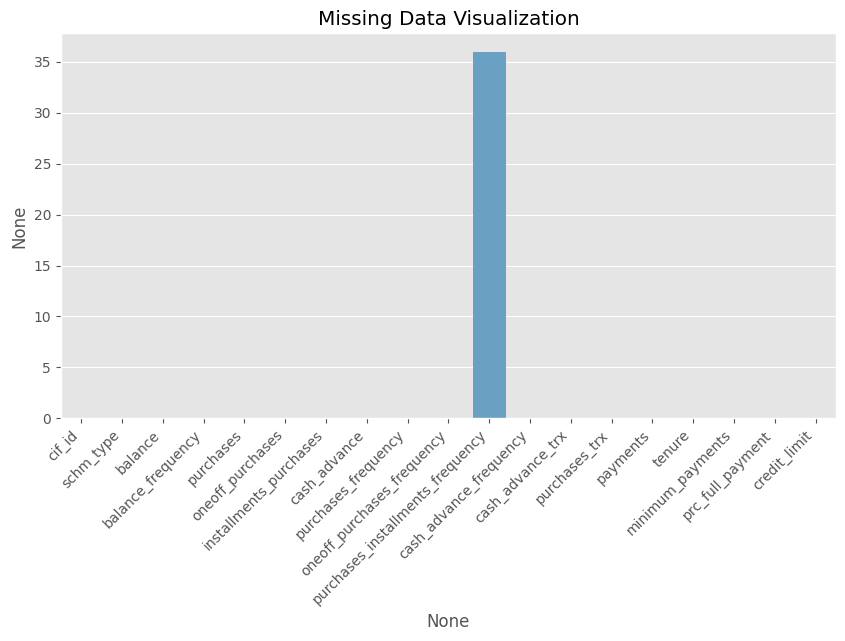

In [16]:
# Plotting missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=cus_df.columns, y=cus_df.isnull().sum(), palette='Blues')
plt.xticks(rotation=45, ha='right')
plt.title('Missing Data Visualization')
plt.show()

In [17]:
cus_df.isnull().sum()

cif_id                               0
schm_type                            0
balance                              0
balance_frequency                    0
purchases                            0
oneoff_purchases                     0
installments_purchases               0
cash_advance                         0
purchases_frequency                  0
oneoff_purchases_frequency           0
purchases_installments_frequency    36
cash_advance_frequency               0
cash_advance_trx                     0
purchases_trx                        0
payments                             0
tenure                               0
minimum_payments                     0
prc_full_payment                     0
credit_limit                         0
dtype: int64

In [21]:
cus_df[cus_df['purchases_installments_frequency'].isnull() == True]

,cif_id,schm_type,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,tenure,minimum_payments,prc_full_payment,credit_limit
4,DLNINDV2090590,SBA,40785.14,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,3,40785.14,38,1250.0,0,25000.0
5,DLNINDV2090590,LAA,40785.14,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,40785.14,38,1250.0,0,25000.0
6,DLNINDV2090590,ODA,40785.14,0,0.0,0.0,0.0,40785.14,0,0,NaN,0,3,0,40785.14,38,1250.0,0,25000.0
54,DLNINDV6312728,SBA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,82,0.0,0,0.0
55,DLNINDV6312728,ODA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,82,0.0,0,0.0
86,DLNINDV8271578,ODA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,66,0.0,0,0.0
110,DLNLEG1002018,LAA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,25,0.0,0,0.0
111,DLNLEG1002018,ODA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,25,0.0,0,0.0
112,DLNLEG1002018,PCA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,25,0.0,0,0.0
113,DLNLEG1154524,ODA,0.00,0,0.0,0.0,0.0,0.00,0,0,NaN,0,0,0,0.00,7,0.0,0,0.0


# Credit Limit

In [24]:
## Replacing "Credit Limit" With Mean value
cus_df.loc[(cus_df['credit_limit'].isnull() == True), 'credit_limit'] = cus_df['credit_limit'].mean()

In [25]:
cus_df.isnull().sum()

cif_id                               0
schm_type                            0
balance                              0
balance_frequency                    0
purchases                            0
oneoff_purchases                     0
installments_purchases               0
cash_advance                         0
purchases_frequency                  0
oneoff_purchases_frequency           0
purchases_installments_frequency    36
cash_advance_frequency               0
cash_advance_trx                     0
purchases_trx                        0
payments                             0
tenure                               0
minimum_payments                     0
prc_full_payment                     0
credit_limit                         0
dtype: int64

## Check for outliers:
Using IQR, we can follow the below approach to find outliers:

* Calculate the first and third quartile (Q1 and Q3).
* Further, evaluate the interquartile range, IQR = Q3-Q1.
* Estimate the lower bound, the lower bound = Q11.5
* Estimate the upper bound, upper bound = Q31.5
* The data points that lie outside of the lower and the upper bound are outliers.

In [31]:
def outlier_percent(data):
    """Calculates the percentage of outliers in a column using the IQR method."""
    data = pd.to_numeric(data, errors='coerce')  # Convert to numeric (force errors to NaN)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers = np.sum((data < minimum) | (data > maximum))
    num_total = data.count()  # Count non-null values
    return (num_outliers / num_total) * 100 if num_total > 0 else 0

In [32]:
# Ensure all columns are numeric
non_categorical_data = cus_df.drop(['cif_id'], axis=1).apply(pd.to_numeric, errors='coerce')

# Check for outliers in each column
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    percent = round(outlier_percent(data), 2)
    print(f'Outliers in "{column}": {percent}%')

Outliers in "schm_type": 0%
Outliers in "balance": 29.68%
Outliers in "balance_frequency": 0.0%
Outliers in "purchases": 20.09%
Outliers in "oneoff_purchases": 16.89%
Outliers in "installments_purchases": 20.55%
Outliers in "cash_advance": 20.55%
Outliers in "purchases_frequency": 21.92%
Outliers in "oneoff_purchases_frequency": 0.0%
Outliers in "purchases_installments_frequency": 0.0%
Outliers in "cash_advance_frequency": 0.0%
Outliers in "cash_advance_trx": 21.0%
Outliers in "purchases_trx": 7.31%
Outliers in "payments": 15.53%
Outliers in "tenure": 0.0%
Outliers in "minimum_payments": 24.66%
Outliers in "prc_full_payment": 0.0%
Outliers in "credit_limit": 24.66%


## Removing Outliers
Let's get rid of the noise. First set all outliers as NaN, so it will be taken care of in the next stage, where I impute the missing values.

In [33]:
for column in non_categorical_data.columns:
    data = non_categorical_data[column]
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
 
    outliers = ((data < minimum) | (data > maximum))
    non_categorical_data[column].loc[outliers] = np.nan
    
non_categorical_data.isna().sum()

schm_type                           219
balance                              65
balance_frequency                     0
purchases                            44
oneoff_purchases                     37
installments_purchases               45
cash_advance                         45
purchases_frequency                  48
oneoff_purchases_frequency            0
purchases_installments_frequency     36
cash_advance_frequency                0
cash_advance_trx                     46
purchases_trx                        16
payments                             34
tenure                                0
minimum_payments                     54
prc_full_payment                      0
credit_limit                         54
dtype: int64

# Imputing the missing data - KNN Imputer
I use KNN imputer: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [36]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Convert all columns to numeric (forcing errors='coerce' to handle unexpected types)
numeric_data = non_categorical_data.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely NaN before applying KNNImputer
numeric_data = numeric_data.dropna(axis=1, how='all')

# Check the new column count
print(f"Columns before imputation: {numeric_data.shape[1]}")

# Apply KNN imputation
imputer = KNNImputer()
imputed_array = imputer.fit_transform(numeric_data)

# Convert back to DataFrame with correct column names
imp_data = pd.DataFrame(imputed_array, columns=numeric_data.columns)

# Check for remaining NaN values
print("Remaining missing values after imputation:")
print(imp_data.isna().sum())



Columns before imputation: 17
Remaining missing values after imputation:
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
payments                            0
tenure                              0
minimum_payments                    0
prc_full_payment                    0
credit_limit                        0
dtype: int64


In [37]:
# Duplicated value

cus_df.duplicated().sum()

np.int64(0)

# 2. Data Visualization -

We will visualise the data, to find hidden patterns or trends.

### 2.1 Distplot

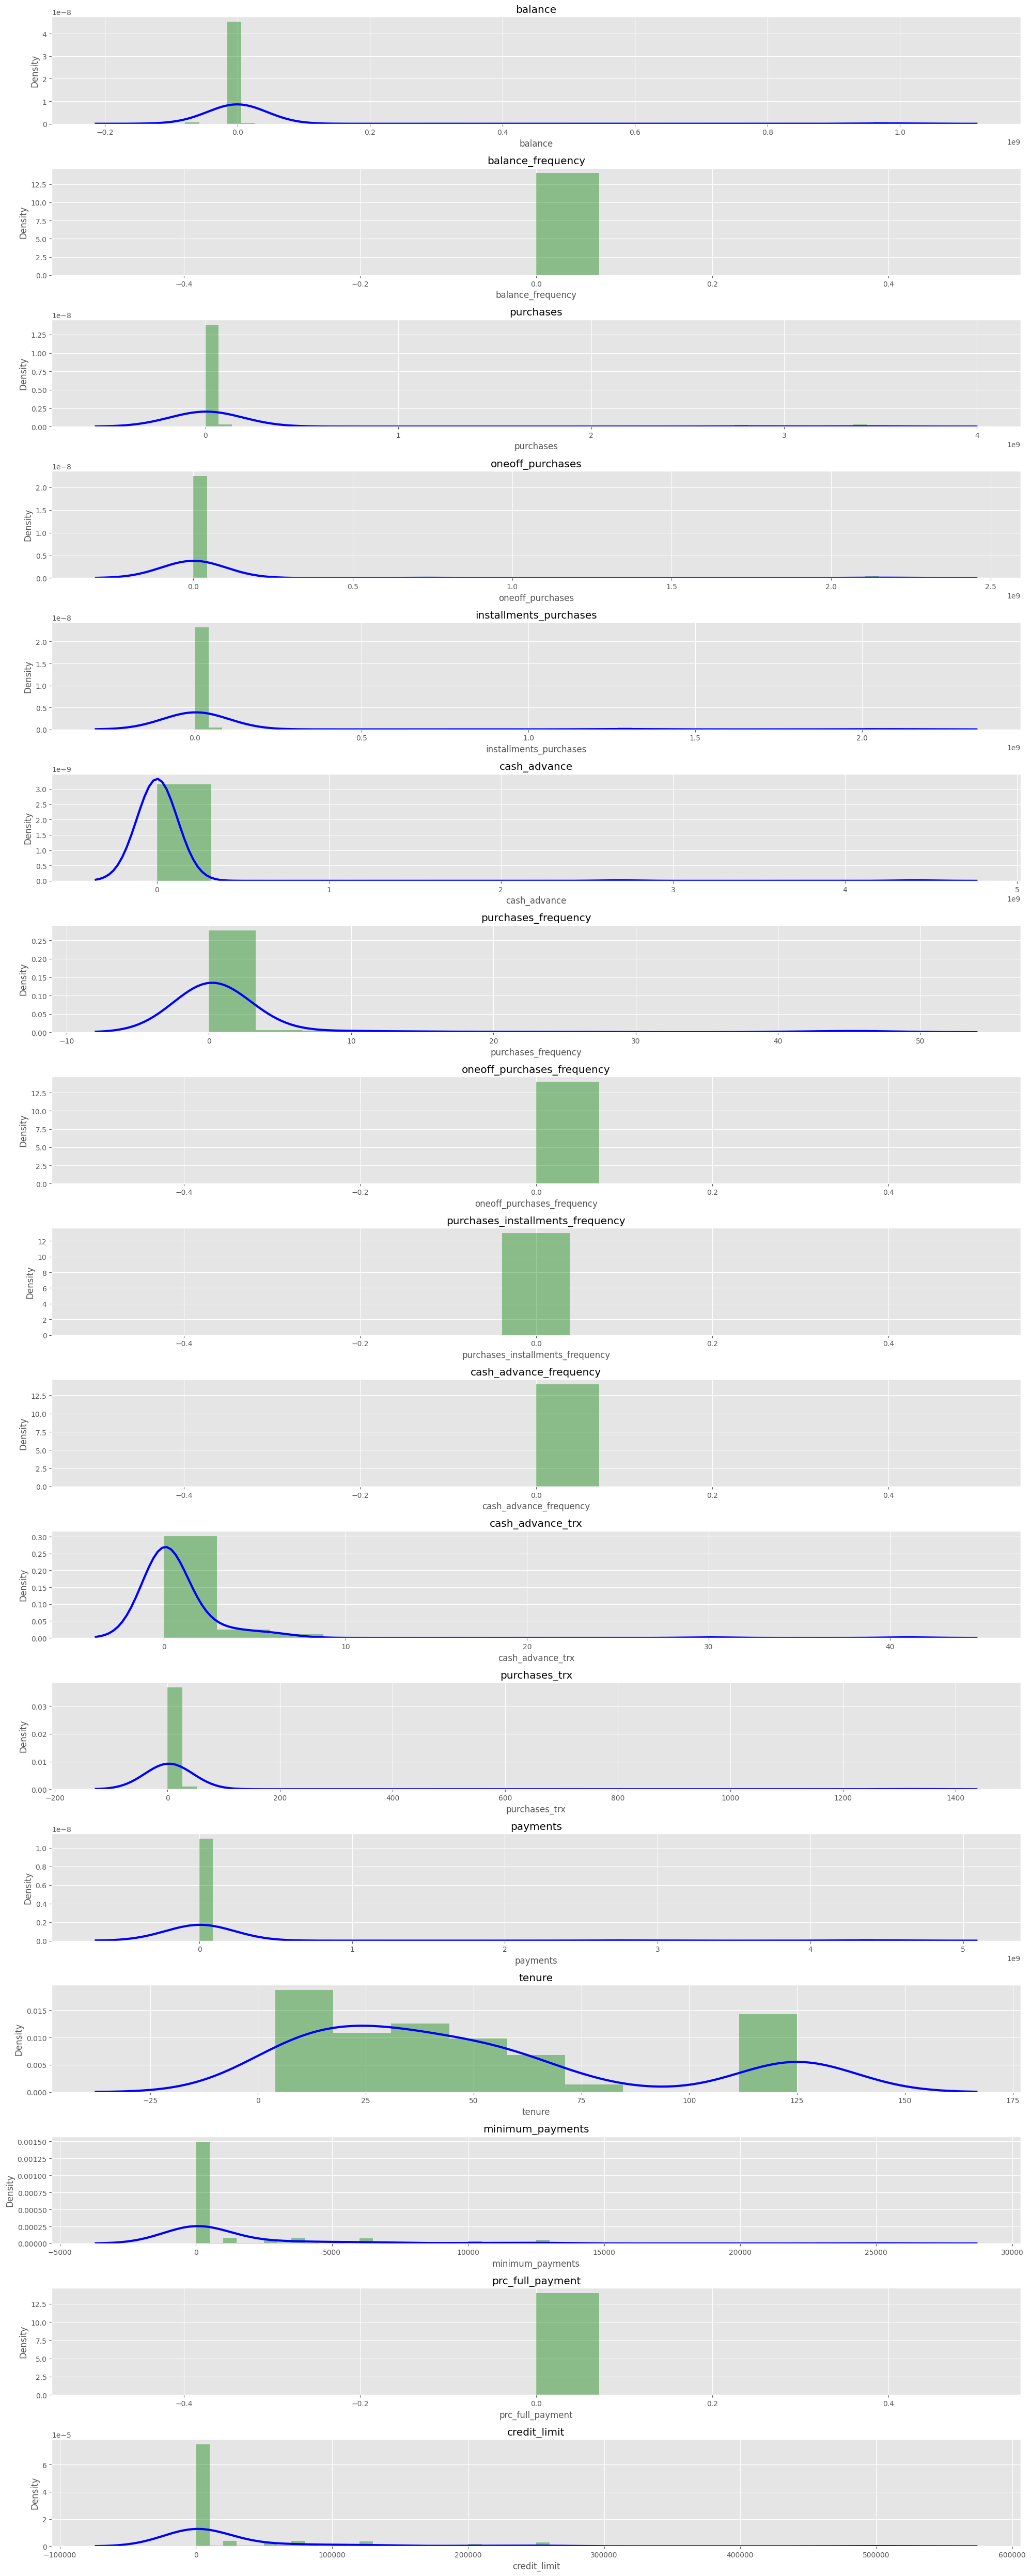

In [46]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns (ignoring categorical/string columns)
numeric_columns = cus_df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(20, 50))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    # sns.histplot(cus_df[column], kde=True, color="g", bins=30)  # Use histplot (seaborn's recommended function)
    displot = sns.distplot(cus_df[column], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(column)

plt.tight_layout()
plt.show()


# Heat map for correlation analysis `

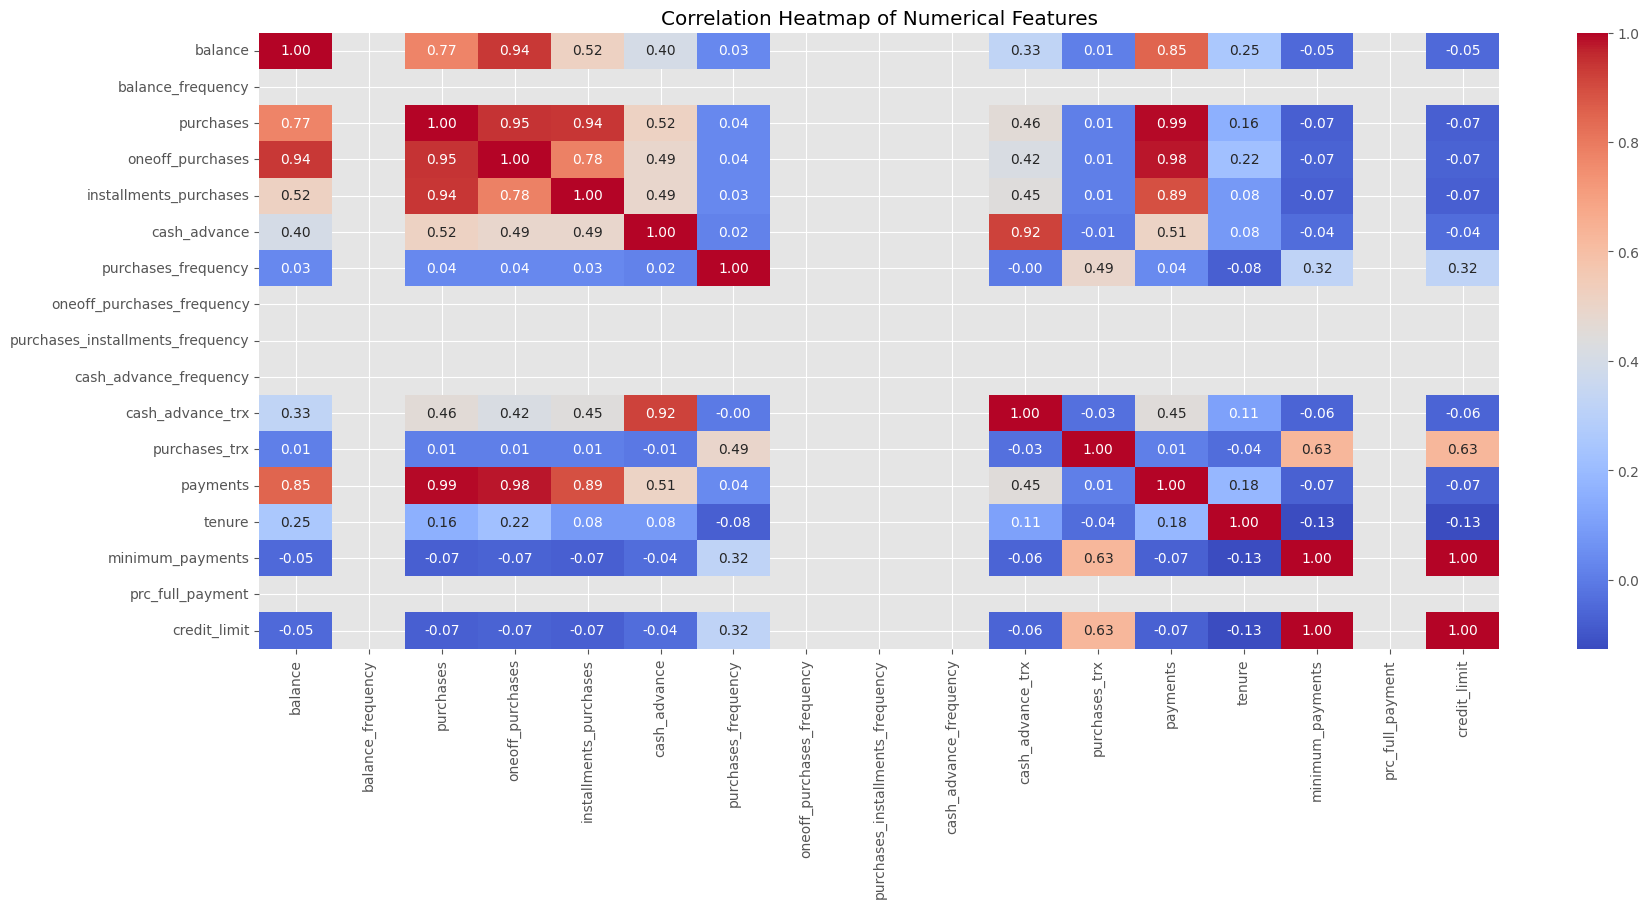

In [49]:
# Select only numeric columns (ignore non-numeric data like customer IDs)
numeric_data = cus_df.select_dtypes(include=['number'])

# Compute correlation matrix
correlations = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Feature Engineering 

In [51]:
cus_df["new_balance_balance_frequency"] = cus_df["balance"] * cus_df["balance_frequency"]
cus_df["new_oneoff_purchases_purchases"] = cus_df["oneoff_purchases"] / cus_df["purchases"]
cus_df["new_installments_purchases_purchases"] = cus_df["installments_purchases"] / cus_df["purchases"]
cus_df["new_cash_advance_purchases_purchases"] = cus_df["cash_advance"] * cus_df["cash_advance_frequency"]
cus_df["new_purchases_purchases_frequency"] = cus_df["purchases"] * cus_df["purchases_frequency"]
cus_df["new_purchases_oneoff_purchases_frequency"] = cus_df["purchases"] * cus_df["oneoff_purchases_frequency"]
cus_df["new_purchases_purchases_trx"] = cus_df["purchases"] / cus_df["purchases_trx"]
cus_df["new_cash_advance_cash_advance_trx"] = cus_df["cash_advance"] / cus_df["cash_advance_trx"]
cus_df["new_balance_credit_limit"] = cus_df["balance"] / cus_df["credit_limit"]
cus_df["new_payments_credit_limit"] = cus_df["payments"] / cus_df["minimum_payments"]


In [52]:
# Checking missing 

cus_df.isnull().sum().sort_values(ascending=False).head()
# creditcard_df.isnull().sum().sort_values(ascending=False).head()

new_cash_advance_cash_advance_trx       173
new_oneoff_purchases_purchases           36
new_installments_purchases_purchases     36
purchases_installments_frequency         36
new_purchases_purchases_trx              35
dtype: int64

In [53]:
cus_df.fillna(0, inplace=True)

In [54]:
cus_df.isnull().sum().sort_values(ascending=False).head()

cif_id               0
schm_type            0
balance              0
balance_frequency    0
purchases            0
dtype: int64

In [55]:
#Indexing CUST_ID feature
cus_df.set_index('cif_id', inplace=True)
cus_df.head()

,schm_type,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,new_balance_balance_frequency,new_oneoff_purchases_purchases,new_installments_purchases_purchases,new_cash_advance_purchases_purchases,new_purchases_purchases_frequency,new_purchases_oneoff_purchases_frequency,new_purchases_purchases_trx,new_cash_advance_cash_advance_trx,new_balance_credit_limit,new_payments_credit_limit
cif_id,,,,,,,,,,,,,,,,,,,,,
DLNINDV1034377,SBA,26694.96,0,1160.00,960.00,200.00,0.0,0,0,0.0,...,0.0,0.827586,0.172414,0.0,0.00,0.0,3.866667e+02,0.0,0.106780,2.228397
DLNINDV1593478,SBA,595007.27,0,2685491.73,579037.54,2106454.19,0.0,15,0,0.0,...,0.0,0.215617,0.784383,0.0,40282375.95,0.0,2.685492e+06,0.0,15.866861,1749.599467
DLNINDV1884561,TDA,-891074.92,0,1001500.00,999000.00,2500.00,0.0,0,0,0.0,...,-0.0,0.997504,0.002496,0.0,0.00,0.0,1.430714e+05,0.0,-14.257199,35.336026
DLNINDV1884561,SBA,-891074.92,0,1001500.00,999000.00,2500.00,0.0,0,0,0.0,...,-0.0,0.997504,0.002496,0.0,0.00,0.0,1.430714e+05,0.0,-14.257199,35.336026
DLNINDV2090590,SBA,40785.14,0,0.00,0.00,0.00,0.0,0,0,0.0,...,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000e+00,0.0,1.631406,32.628112


In [59]:


def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

# Apply the function only to numeric columns
numeric_cols = cus_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    replace_with_thresholds(cus_df, col)


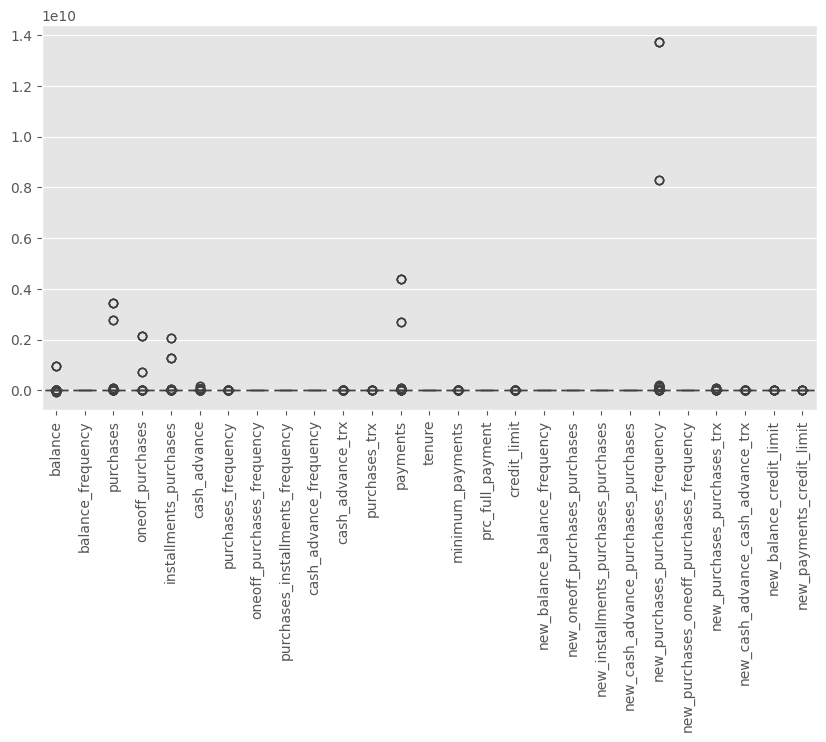

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cus_df)
plt.xticks(rotation=90)
plt.show()

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select only numeric columns
numeric_cols = cus_df.select_dtypes(include=['number']).columns
cus_df_numeric = cus_df[numeric_cols].copy()

# Handle NaN values by replacing with median of the column
cus_df_numeric.fillna(cus_df_numeric.median(), inplace=True)

# Replace infinite values with the maximum finite value in the column
cus_df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
cus_df_numeric.fillna(cus_df_numeric.max(), inplace=True)

# Apply Min-Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(cus_df_numeric)

# Convert back to DataFrame
data_scaled = pd.DataFrame(df_scaled, columns=numeric_cols, index=cus_df.index)

# Display result
data_scaled.head()


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,new_balance_balance_frequency,new_oneoff_purchases_purchases,new_installments_purchases_purchases,new_cash_advance_purchases_purchases,new_purchases_purchases_frequency,new_purchases_oneoff_purchases_frequency,new_purchases_purchases_trx,new_cash_advance_cash_advance_trx,new_balance_credit_limit,new_payments_credit_limit
cif_id,,,,,,,,,,,,,,,,,,,,,
DLNINDV1034377,0.074407,0.0,3.383869e-07,4.465116e-07,9.775203e-08,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.827586,0.173104,0.0,0.000000,0.0,0.000004,0.0,0.476827,0.001274
DLNINDV1593478,0.074944,0.0,7.833923e-04,2.693198e-04,1.029551e-03,0.0,0.326087,0.0,0.0,0.0,...,0.0,0.215617,0.787522,0.0,0.002938,0.0,0.029116,0.0,1.000000,1.000000
DLNINDV1884561,0.073541,0.0,2.921504e-04,4.646512e-04,1.221900e-06,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.997504,0.002506,0.0,0.000000,0.0,0.001551,0.0,0.000000,0.020197
DLNINDV1884561,0.073541,0.0,2.921504e-04,4.646512e-04,1.221900e-06,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.997504,0.002506,0.0,0.000000,0.0,0.001551,0.0,0.000000,0.020197
DLNINDV2090590,0.074420,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.527439,0.018649


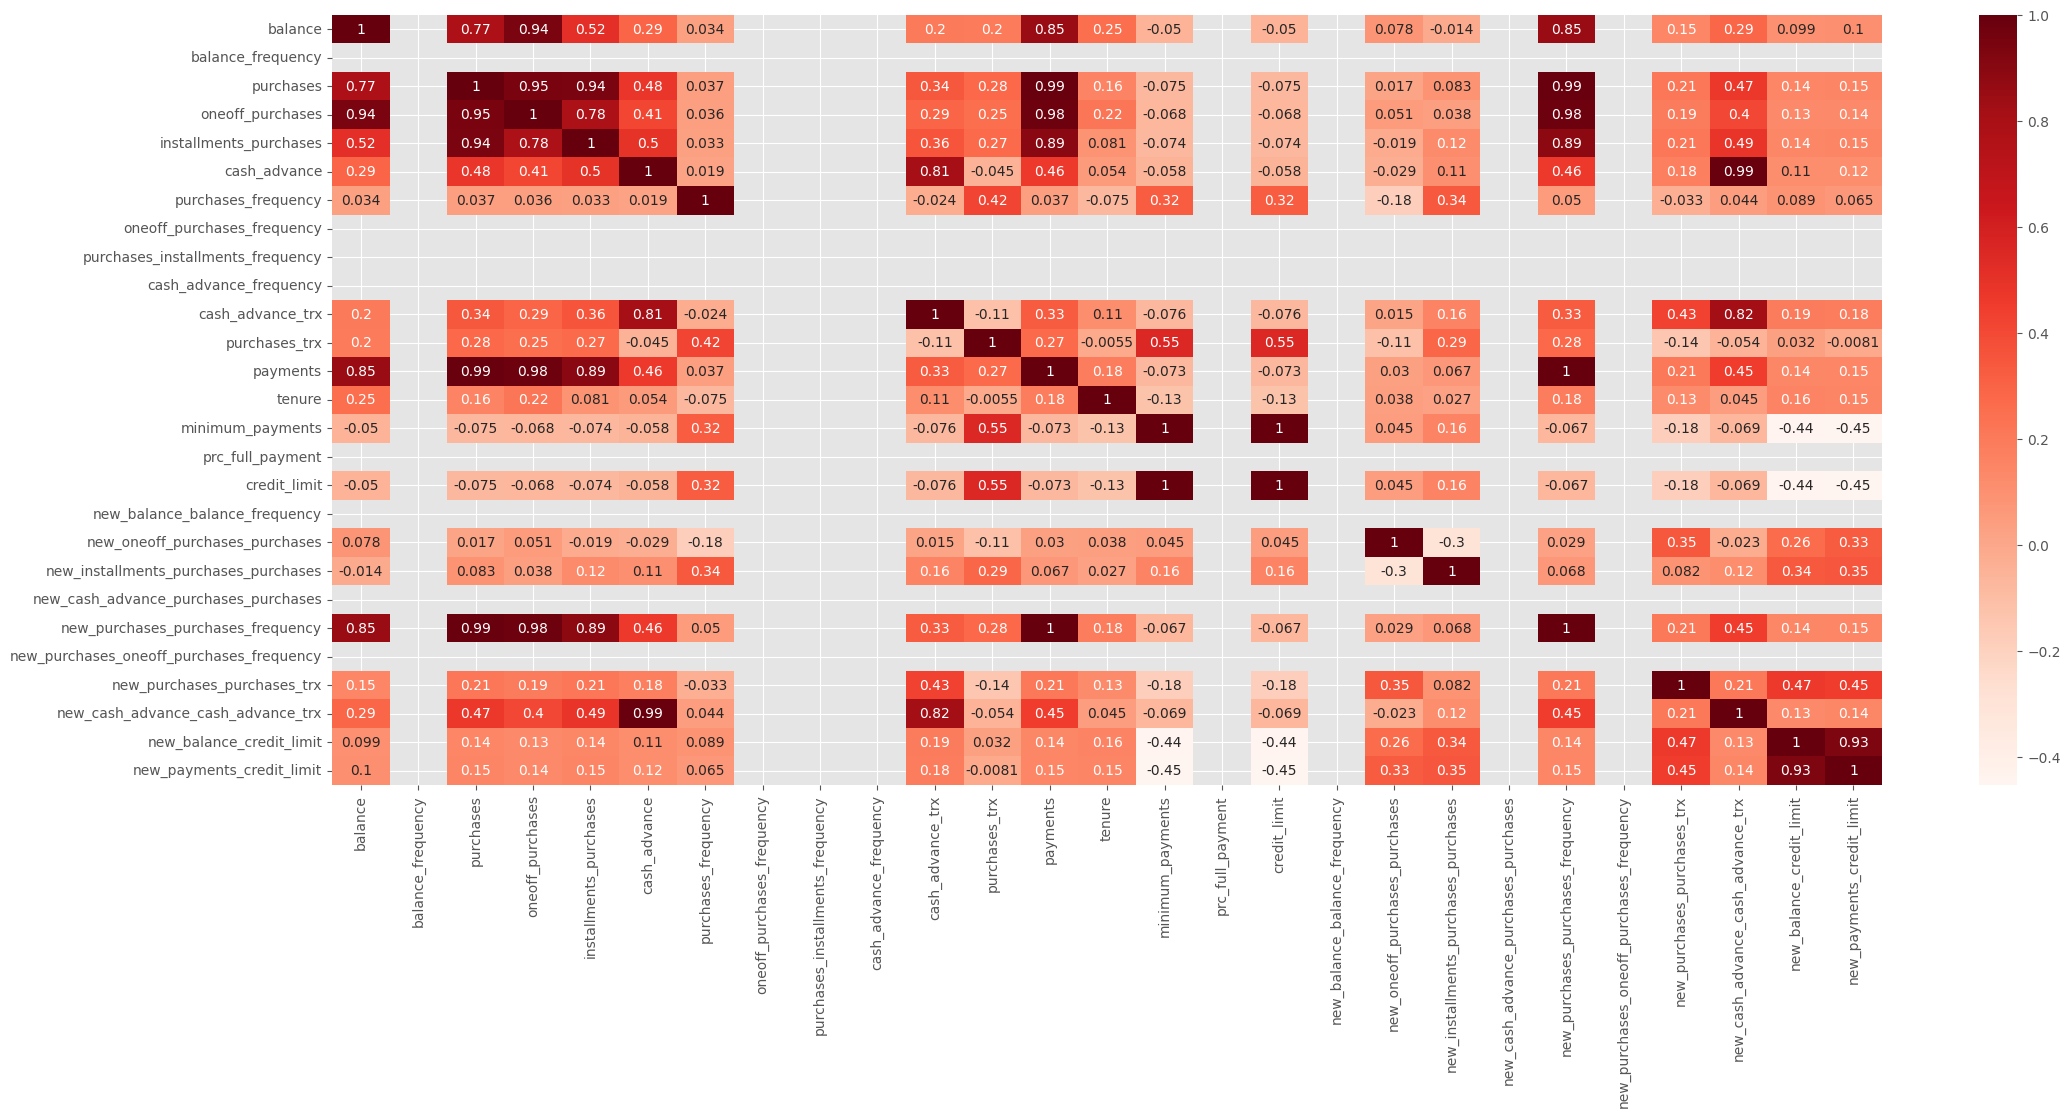

In [65]:
# Feature Selection

#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [66]:
#Correlation with BALANCE variable
cor_target = abs(cor["balance"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

balance                              1.000000
purchases                            0.773499
oneoff_purchases                     0.937824
installments_purchases               0.516512
payments                             0.847188
new_purchases_purchases_frequency    0.848827
Name: balance, dtype: float64

In [67]:
cor_target

balance                                     1.000000
balance_frequency                                NaN
purchases                                   0.773499
oneoff_purchases                            0.937824
installments_purchases                      0.516512
cash_advance                                0.291946
purchases_frequency                         0.034040
oneoff_purchases_frequency                       NaN
purchases_installments_frequency                 NaN
cash_advance_frequency                           NaN
cash_advance_trx                            0.204150
purchases_trx                               0.197292
payments                                    0.847188
tenure                                      0.253991
minimum_payments                            0.050019
prc_full_payment                                 NaN
credit_limit                                0.050019
new_balance_balance_frequency                    NaN
new_oneoff_purchases_purchases              0.

# LASSO CV Feature Importance


In [71]:
from sklearn.linear_model import LassoCV

# Corrected drop() method
X = data_scaled.drop(["balance", "new_balance_balance_frequency", "new_balance_credit_limit", "balance_frequency"], axis=1)   # Feature Matrix
y = data_scaled["balance"]  # Target Variable

# Lasso Regression Model
reg = LassoCV()
reg.fit(X, y)


LassoCV()

In [72]:

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000081
Best score using built-in LassoCV: 0.999511


In [73]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 20 variables


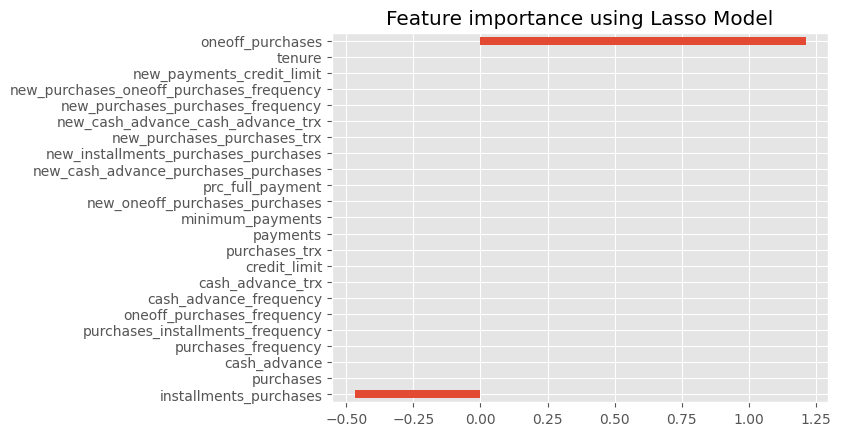

In [74]:
imp_coef = coef.sort_values()
lasso_FE = imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

# Applying Hierarchial Clustering

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [76]:
raw_df=pd.read_csv("new_columns_customer_segmentation.csv")
raw_df.head()

,cif_id,schm_type,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,tenure,minimum_payments,prc_full_payment,credit_limit
0,DLNINDV1034377,SBA,26694.96,0,1160.00,960.00,200.00,0.0,0,0,0.0,0,0,3,27854.96,28,12500.0,0,250000.0
1,DLNINDV1593478,SBA,595007.27,0,2685491.73,579037.54,2106454.19,0.0,15,0,0.0,0,0,1,3280499.00,26,1875.0,0,37500.0
2,DLNINDV1884561,TDA,-891074.92,0,1001500.00,999000.00,2500.00,0.0,0,0,0.0,0,0,7,110425.08,30,3125.0,0,62500.0
3,DLNINDV1884561,SBA,-891074.92,0,1001500.00,999000.00,2500.00,0.0,0,0,0.0,0,0,7,110425.08,30,3125.0,0,62500.0
4,DLNINDV2090590,SBA,40785.14,0,0.00,0.00,0.00,0.0,0,0,NaN,0,0,3,40785.14,38,1250.0,0,25000.0


In [78]:
raw_df = raw_df.drop('cif_id', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,schm_type,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,payments,tenure,minimum_payments,prc_full_payment,credit_limit
0,SBA,26694.96,0,1160.00,960.00,200.00,0.0,0,0,0.0,0,0,3,27854.96,28,12500.0,0,250000.0
1,SBA,595007.27,0,2685491.73,579037.54,2106454.19,0.0,15,0,0.0,0,0,1,3280499.00,26,1875.0,0,37500.0


In [80]:
# Select only numeric columns
numeric_cols = raw_df.select_dtypes(include=['number']).columns
raw_df_numeric = raw_df[numeric_cols].copy()

# Handle NaN values by replacing with median of the column
raw_df_numeric.fillna(raw_df_numeric.median(), inplace=True)

# Replace infinite values with the maximum finite value in the column
raw_df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
raw_df_numeric.fillna(raw_df_numeric.max(), inplace=True)

# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(raw_df_numeric)

# Normalize the data
normalized_df = normalize(scaled_df)

# Convert numpy array to DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=numeric_cols)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df)

# Convert PCA result to DataFrame
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Display the first 2 rows
X_principal.head(2)

,P1,P2
0,0.395732,1.109647
1,-0.033448,0.504984


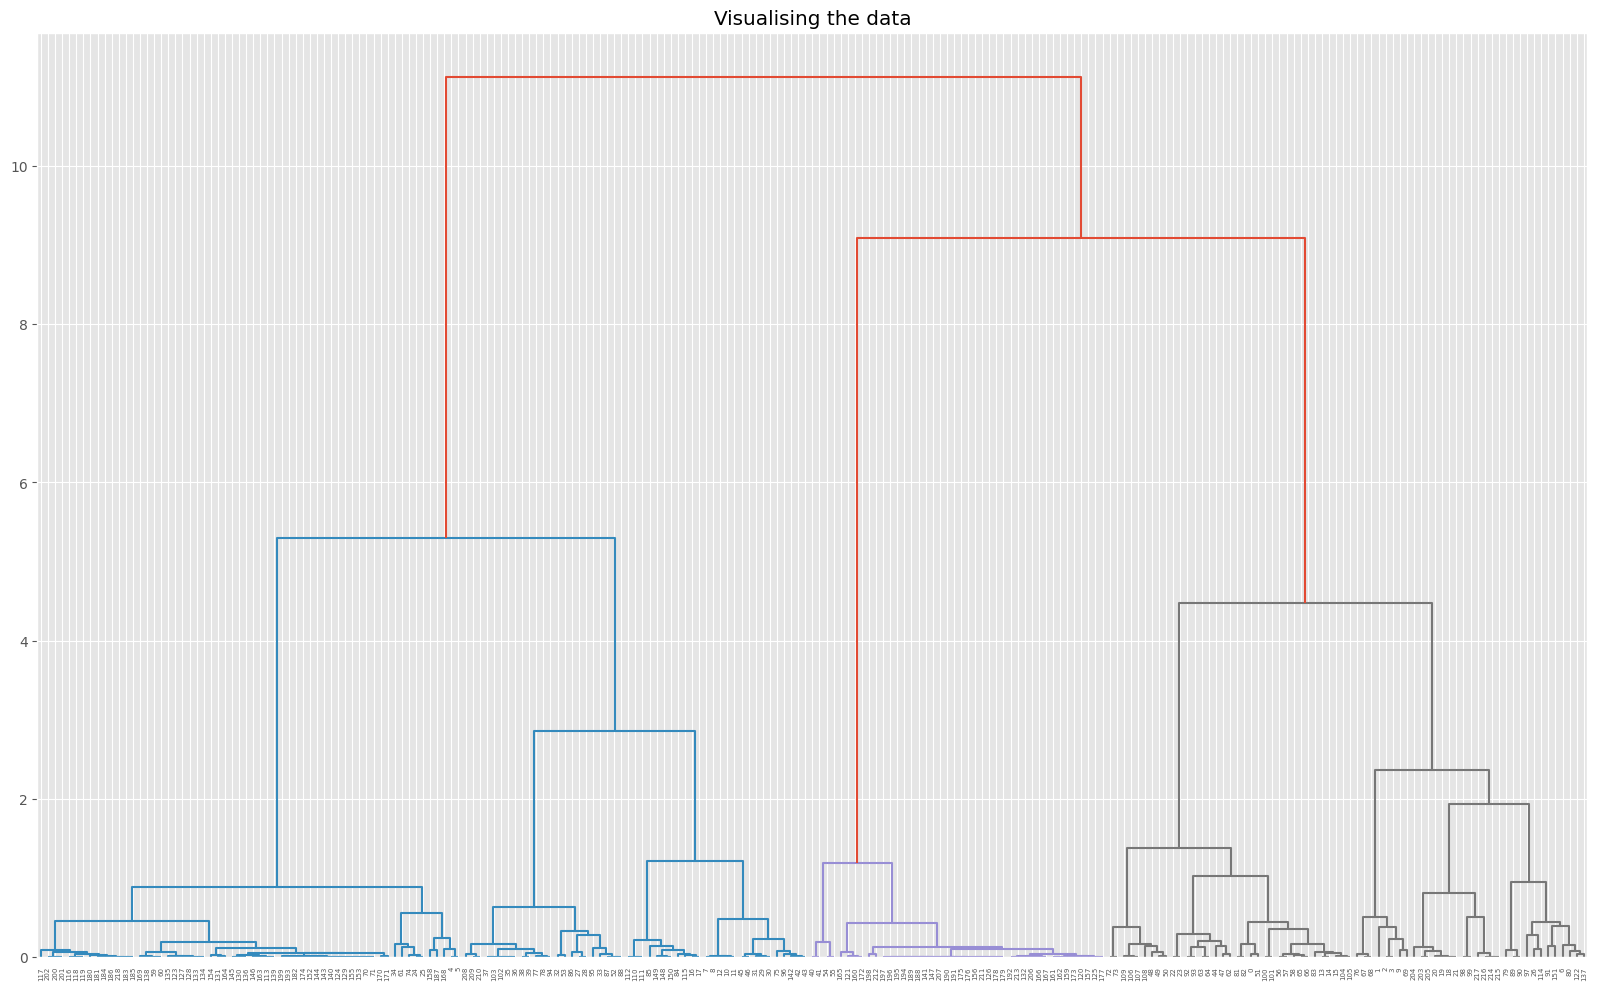

In [85]:
plt.figure(figsize =(20, 12)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

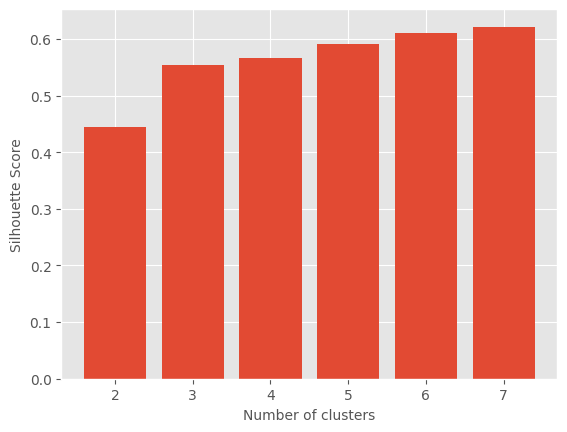

In [86]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, 
                         AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [87]:
agg = AgglomerativeClustering(n_clusters = 6)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=6)

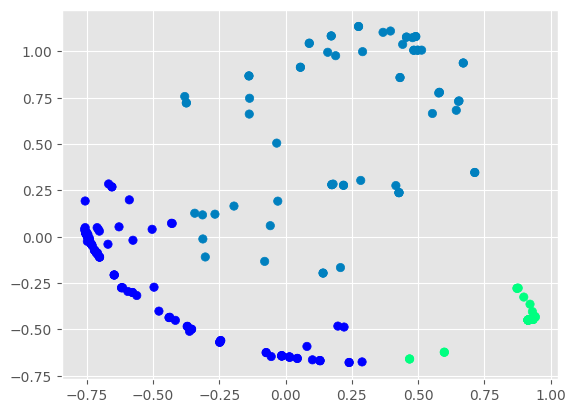

In [88]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

In [89]:
# Obtain the principal components 

pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(data_scaled)
principal_comp

array([[-8.01008333e-01,  3.66988049e-01],
       [ 7.07411232e-02, -7.60859471e-01],
       [-8.79993530e-01,  5.74224835e-01],
       [-8.79993530e-01,  5.74224835e-01],
       [-8.81163400e-01,  1.11496263e-01],
       [-8.80885573e-01,  1.13295056e-01],
       [-8.68620278e-01,  1.23933695e-01],
       [ 8.76765696e-02, -7.27094752e-01],
       [ 8.76765696e-02, -7.27094752e-01],
       [-7.18210337e-01, -5.49704206e-02],
       [ 9.14542020e-02, -7.67252221e-01],
       [ 9.14542020e-02, -7.67252221e-01],
       [ 6.64338428e-01, -1.62316284e-01],
       [-2.11225360e-01,  7.11098466e-01],
       [-7.92154632e-01,  1.00243586e-01],
       [-1.94857457e-01,  7.25291057e-01],
       [ 1.21069656e-01, -2.37434894e-01],
       [ 1.21069656e-01, -2.37434894e-01],
       [ 1.03469401e-01, -8.03214027e-01],
       [ 6.62829557e-01, -2.16472341e-01],
       [ 6.72302198e-01, -2.10041105e-01],
       [ 1.03469401e-01, -8.03214027e-01],
       [-7.45191754e-01, -1.11004534e-01],
       [-7.

In [90]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.801008,0.366988
1,0.070741,-0.760859
2,-0.879994,0.574225
3,-0.879994,0.574225
4,-0.881163,0.111496


In [93]:
from sklearn.cluster import KMeans

# Assuming `X_principal` is the PCA-transformed data
num_clusters = 6  # Use the optimal number of clusters based on the Silhouette Score

# Fit KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X_principal)  # Generates cluster labels

# Convert labels into a DataFrame and concatenate with `pca_df`
pca_df = pd.concat([X_principal, pd.DataFrame({'cluster': labels}, index=X_principal.index)], axis=1)

# Display the updated dataframe
pca_df.head()


,P1,P2,cluster
0,0.395732,1.109647,0
1,-0.033448,0.504984,2
2,-0.138119,0.867444,2
3,-0.138119,0.867444,2
4,-0.430215,0.072670,3


# pca_df.shape

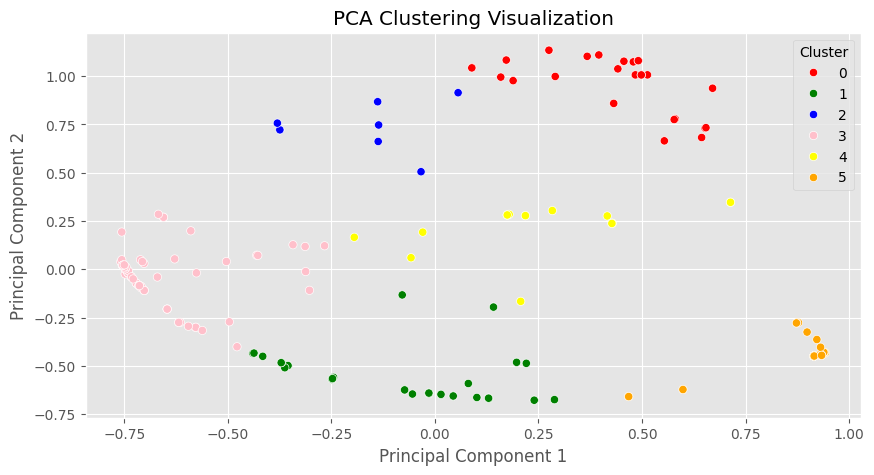

In [95]:
plt.figure(figsize=(10,5))  # Adjust figure size

# Ensure the correct column names are used
pca_df.columns = ['P1', 'P2', 'cluster']  # Rename PCA columns if needed

# Scatter plot
ax = sns.scatterplot(x="P1", y="P2", hue="cluster", data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'orange'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Clustering Visualization")
plt.legend(title="Cluster")
plt.show()

In [96]:
# Merge cluster labels with the original dataset
raw_df_with_clusters = raw_df.copy()  # Copy original data
raw_df_with_clusters['cluster'] = pca_df['cluster']  # Add cluster labels


In [98]:
# Merge cluster labels with the original dataset
raw_df_with_clusters = raw_df.copy()  # Make a copy of the original dataset
raw_df_with_clusters['cluster'] = pca_df['cluster']

# Now run the aggregation
import pandas as pd

# Select only numeric columns for aggregation
numeric_columns = raw_df_with_clusters.select_dtypes(include=['number']).columns

# Compute summary statistics for numeric features per cluster
cluster_summary = raw_df_with_clusters.groupby('cluster')[numeric_columns].agg(['mean', 'median', 'std', 'min', 'max'])

# Save the cluster summary to a CSV file for download
csv_filename = "cluster_summary.csv"
cluster_summary.to_csv(csv_filename)

# Provide the download link
print(f"Download the cluster summary: {csv_filename}")


OSError: Cannot save file into a non-existent directory: '/mnt/data'